In [1]:
import warnings
warnings.filterwarnings('ignore')

import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Cardeza, Mr. Thomas Drake Martinez",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [6]:
"""
Drop three columns (PassengerId, Ticket, Cabin) first since:
PassengerId: As same as row index
Ticket:      No correlation with the target and uniqueness
Cabin:       Too many missing values
"""
train.drop(['Ticket','Cabin','PassengerId'],axis=1,inplace=True)

## Missing Values

In [7]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [8]:
train.groupby(['Embarked'])['Survived'].count().sort_values(ascending=False)

Embarked
S    644
C    168
Q     77
Name: Survived, dtype: int64

In [9]:
train['Age'].dropna().mean()

29.69911764705882

In [10]:
train[['Age','Pclass',"Sex"]].groupby(['Pclass','Sex']).mean()

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

### Replace missing values

In [11]:
train.loc[(train['Pclass']==1) & (train['Sex']=='female') & (train['Age'].isnull()),'Age'] = 34.611765
train.loc[(train['Pclass']==2) & (train['Sex']=='female') & (train['Age'].isnull()),'Age'] = 28.722973
train.loc[(train['Pclass']==3) & (train['Sex']=='female') & (train['Age'].isnull()),'Age'] = 21.75
train.loc[(train['Pclass']==1) & (train['Sex']=='male') & (train['Age'].isnull()),'Age'] = 41.281386
train.loc[(train['Pclass']==2) & (train['Sex']=='male') & (train['Age'].isnull()),'Age'] = 30.740707
train.loc[(train['Pclass']==3) & (train['Sex']=='male') & (train['Age'].isnull()),'Age'] = 26.507589

In [12]:
train['Embarked'].replace(np.nan, 'S', inplace=True)

In [13]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Data Oveview
### Distribution of Target

In [14]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

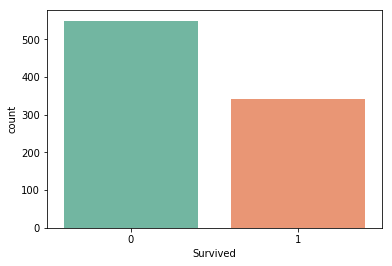

In [15]:
sns.countplot('Survived',data=train, palette ='Set2')

### Gender

In [16]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
train[['Survived','Sex']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


### Pclass

In [18]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [19]:
train[['Survived','Pclass']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### Number of Siblings

In [20]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [21]:
train[['Survived','SibSp']].groupby(['SibSp']).mean().sort_values(by=['Survived'],ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


### Number of Parents

In [22]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [23]:
train[['Survived','Parch']].groupby(['Parch']).mean().sort_values(by=['Survived'],ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


### Embarked

In [24]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
train[['Survived','Embarked']].groupby(['Embarked']).mean().sort_values(by=['Survived'],ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


### Age

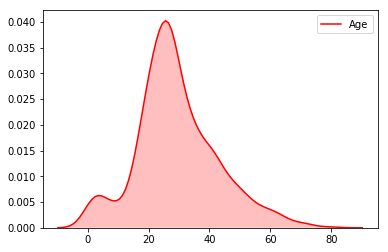

In [26]:
sns.kdeplot(train['Age'],shade=True,color='r')

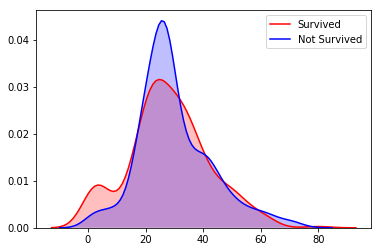

In [27]:
fig, ax = plt.subplots(1,1)
sns.kdeplot(train[train['Survived']==1]['Age'],shade=True,color='r')
sns.kdeplot(train[train['Survived']==0]['Age'],shade=True,color='b')
plt.legend(['Survived','Not Survived'])
plt.show()

### Fare

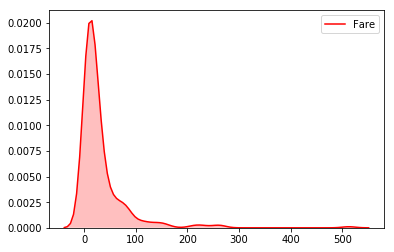

In [28]:
sns.kdeplot(train['Fare'],shade=True,color='r')

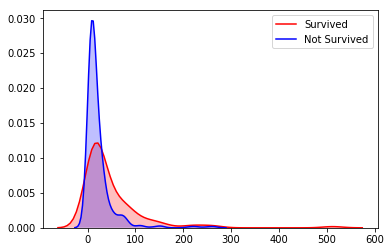

In [29]:
#%matplotlib notebook
fig, ax = plt.subplots(1,1)
sns.kdeplot(train[train['Survived']==1]['Fare'],shade=True,color='r')
sns.kdeplot(train[train['Survived']==0]['Fare'],shade=True,color='b')
plt.legend(['Survived','Not Survived'])
plt.show()

## Feature Engineering

In [30]:
train['Title'] = train['Name'].str.split(",",expand=True)[1].str.split(".",expand=True)[0]
train['Family Size'] = train['Parch']+train["SibSp"]+1
train['Alone'] = 1
train.loc[(train['SibSp']>0) | (train['Parch']>0),'Alone'] = 0
train['Age_interval'] = 0
train.loc[(train['Age']>17) & (train['Age']<=31),'Age_interval'] = 1
train.loc[(train['Age']>31) & (train['Age']<=40),'Age_interval'] = 2
train.loc[(train['Age']>40) & (train['Age']<=59),'Age_interval'] = 3
train.loc[train['Age']>59,'Age_interval'] = 4
train['Fare_interval'] = 0
train.loc[train['Fare']>30,'Fare_interval'] = 1
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family Size,Alone,Age_interval,Fare_interval
0,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,7.2500,S,Mr,2,0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,71.2833,C,Mrs,2,0,2,1
2,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,7.9250,S,Miss,1,1,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,53.1000,S,Mrs,2,0,2,1
4,0,3,"Allen, Mr. William Henry",male,35.00,0,0,8.0500,S,Mr,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,13.0000,S,Rev,1,1,1,0
887,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,30.0000,S,Miss,1,1,1,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.75,1,2,23.4500,S,Miss,4,0,1,0
889,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,30.0000,C,Mr,1,1,1,0


In [31]:
train.drop(['Name','SibSp','Parch'],axis=1,inplace=True)
train

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family Size,Alone,Age_interval,Fare_interval
0,0,3,male,22.00,7.2500,S,Mr,2,0,1,0
1,1,1,female,38.00,71.2833,C,Mrs,2,0,2,1
2,1,3,female,26.00,7.9250,S,Miss,1,1,1,0
3,1,1,female,35.00,53.1000,S,Mrs,2,0,2,1
4,0,3,male,35.00,8.0500,S,Mr,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,13.0000,S,Rev,1,1,1,0
887,1,1,female,19.00,30.0000,S,Miss,1,1,1,0
888,0,3,female,21.75,23.4500,S,Miss,4,0,1,0
889,1,1,male,26.00,30.0000,C,Mr,1,1,1,0


### Look at new features

In [32]:
train[['Survived','Age_interval']].groupby(['Age_interval']).mean().sort_values(by=['Survived'],ascending=False)

,Survived
Age_interval,
0,0.539823
2,0.482759
3,0.365517
1,0.326840
4,0.269231


In [33]:
train[['Survived','Fare_interval']].groupby(['Fare_interval']).mean().sort_values(by=['Survived'],ascending=False)

,Survived
Fare_interval,
1,0.581197
0,0.313546


In [34]:
train[['Survived','Family Size']].groupby(['Family Size']).mean().sort_values(by=['Survived'],ascending=False)

,Survived
Family Size,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [35]:
train['Family Size']=train['Family Size'].replace([2,3,4],2)
train['Family Size']=train['Family Size'].replace([5,6,7,8,11],3)
train[['Survived','Family Size']].groupby(['Family Size']).mean().sort_values(by=['Survived'],ascending=False)

,Survived
Family Size,
2,0.578767
1,0.303538
3,0.161290


In [36]:
train[['Survived','Alone']].groupby(['Alone']).mean().sort_values(by=['Survived'],ascending=False)

,Survived
Alone,
0,0.505650
1,0.303538


In [37]:
train['Title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Mlle              2
 Major             2
 Don               1
 Ms                1
 Lady              1
 Jonkheer          1
 Mme               1
 the Countess      1
 Capt              1
 Sir               1
Name: Title, dtype: int64

In [38]:
train[['Survived','Title']].groupby(['Title']).mean().sort_values(by=['Survived'],ascending=False)

,Survived
Title,
the Countess,1.000000
Mlle,1.000000
Sir,1.000000
Ms,1.000000
Lady,1.000000
Mme,1.000000
Mrs,0.792000
Miss,0.697802
Master,0.575000


In [39]:
train['Title']=train['Title'].replace([' the Countess',' Sir',' Capt',' Jonkheer',' Don',' Col',' Major',' Rev',' Dr'],'others')
train['Title']=train['Title'].replace([' Ms',' Mlle',' Lady'],' Miss')
train['Title']=train['Title'].replace([' Mme'],' Mrs')

In [40]:
train[['Survived','Title']].groupby(['Title']).mean().sort_values(by=['Survived'],ascending=False)

,Survived
Title,
Mrs,0.793651
Miss,0.704301
Master,0.575000
others,0.318182
Mr,0.156673


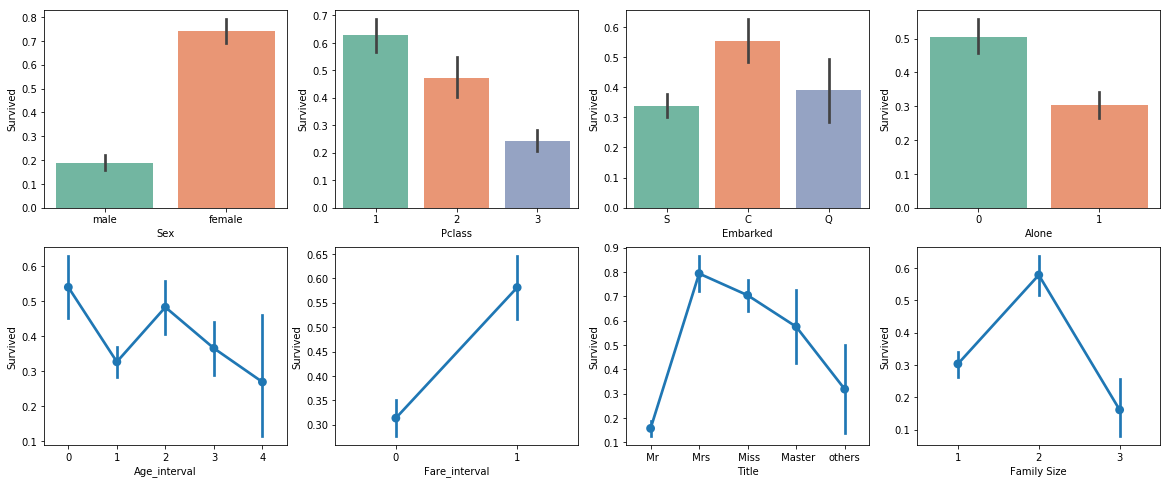

In [41]:
fig, ax = plt.subplots(2, 4,figsize=(20,8))

sns.barplot(x = 'Sex', y = 'Survived', data=train, ax = ax[0,0], palette="Set2")
sns.barplot(x = 'Pclass', y = 'Survived', data=train, ax = ax[0,1], palette="Set2")
sns.barplot(x = 'Embarked', y = 'Survived', data=train, ax = ax[0,2], palette="Set2")
sns.barplot(x = 'Alone', y = 'Survived', data=train, ax = ax[0,3], palette="Set2")

sns.pointplot(x = 'Age_interval', y = 'Survived',  data=train, ax = ax[1,0])
sns.pointplot(x = 'Fare_interval', y = 'Survived',  data=train, ax = ax[1,1])
sns.pointplot(x = 'Title', y = 'Survived',  data=train, ax = ax[1,2])
sns.pointplot(x = 'Family Size', y = 'Survived', data=train, ax = ax[1,3])

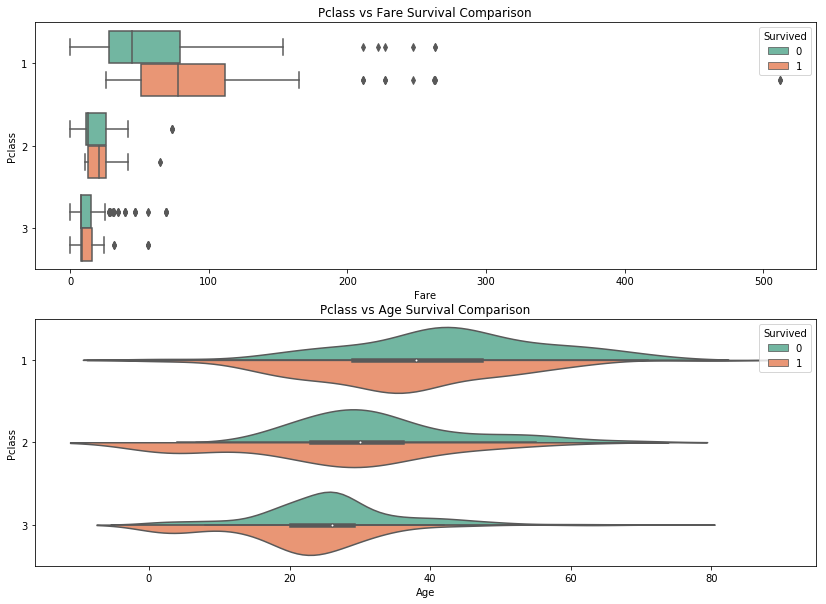

In [42]:
train['Pclass']=train['Pclass'].astype("category")
fig, ax = plt.subplots(2,1,figsize=(14,10))

sns.boxplot(y = 'Pclass', x = 'Fare', hue = 'Survived', data = train, ax = ax[0], palette="Set2")
ax[0].set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(y = 'Pclass', x = 'Age', hue = 'Survived', data = train, split = True, ax = ax[1], palette="Set2")
ax[1].set_title('Pclass vs Age Survival Comparison')
train['Pclass']=train['Pclass'].astype(int)

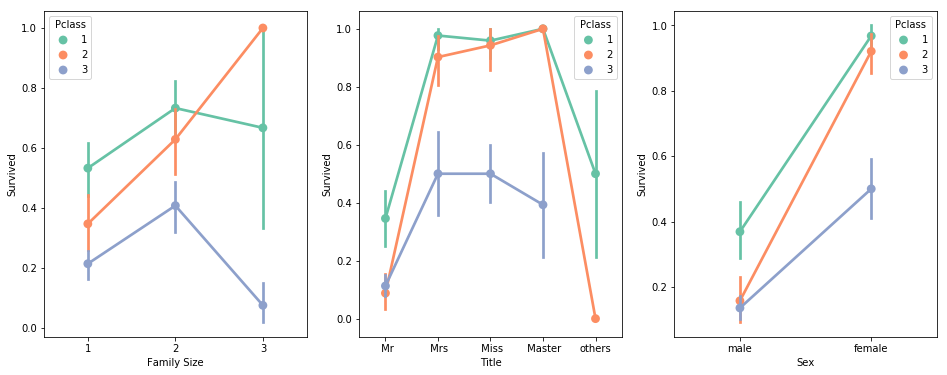

In [43]:
fig, ax = plt.subplots(1, 3,figsize=(16,6))

sns.pointplot(x="Family Size", y="Survived", hue="Pclass", data=train,ax = ax[0], palette="Set2")
sns.pointplot(x="Title", y="Survived", hue="Pclass", data=train,ax = ax[1], palette="Set2")
sns.pointplot(x="Sex", y="Survived", hue="Pclass", data=train,ax = ax[2], palette="Set2")

Text(0.5,1,'Sex vs Age Survival Comparison')

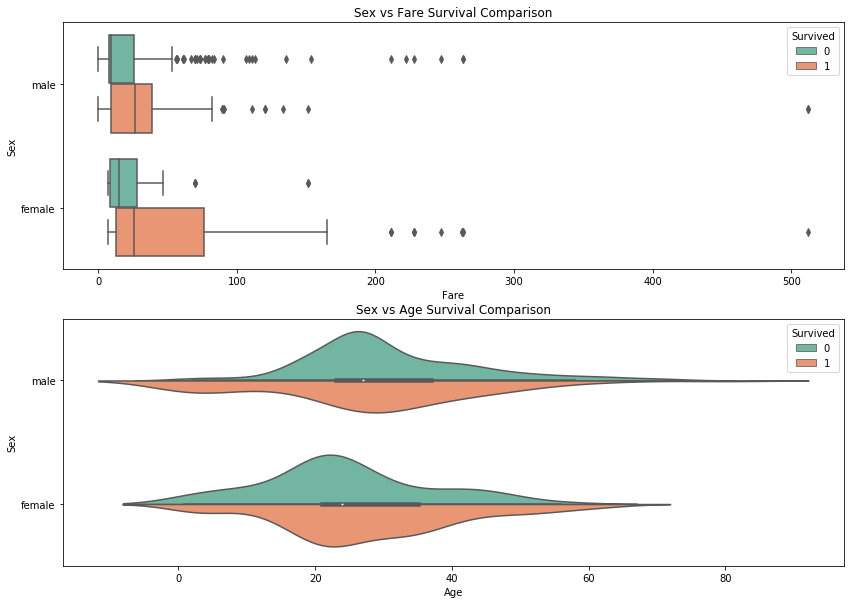

In [44]:
fig, ax = plt.subplots(2,1,figsize=(14,10))

sns.boxplot(y = 'Sex', x = 'Fare', hue = 'Survived', data = train, ax = ax[0], palette="Set2")
ax[0].set_title('Sex vs Fare Survival Comparison')

sns.violinplot(y = 'Sex', x = 'Age', hue = 'Survived', data = train, split = True, ax = ax[1], palette="Set2")
ax[1].set_title('Sex vs Age Survival Comparison')

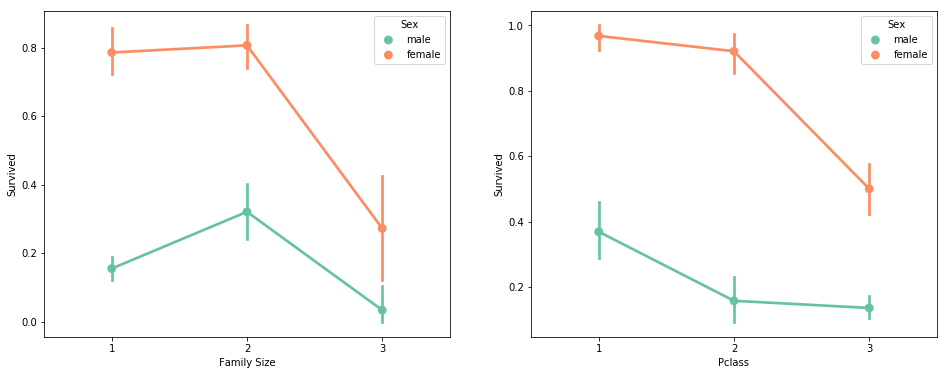

In [45]:
fig, ax = plt.subplots(1, 2,figsize=(16,6))

sns.pointplot(x="Family Size", y="Survived", hue="Sex", data=train,ax = ax[0], palette="Set2")
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=train,ax = ax[1], palette="Set2")

## Encoding

In [46]:
train['Sex'] = train['Sex'].map({'female':0,'male':1})
train['Embarked'] = train['Embarked'].map({'S':0,'Q':1,'C':2})
train['Title'] = train['Title'].map({' Mrs':0,' Miss':1,' Master':2, 'others':3, ' Mr':4})

In [47]:
train

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family Size,Alone,Age_interval,Fare_interval
0,0,3,1,22.00,7.2500,0,4,2,0,1,0
1,1,1,0,38.00,71.2833,2,0,2,0,2,1
2,1,3,0,26.00,7.9250,0,1,1,1,1,0
3,1,1,0,35.00,53.1000,0,0,2,0,2,1
4,0,3,1,35.00,8.0500,0,4,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.00,13.0000,0,3,1,1,1,0
887,1,1,0,19.00,30.0000,0,1,1,1,1,0
888,0,3,0,21.75,23.4500,0,1,2,0,1,0
889,1,1,1,26.00,30.0000,2,4,1,1,1,0


## Model

In [48]:
from sklearn import preprocessing
from sklearn import model_selection

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import f1_score, log_loss, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [49]:
X = train.drop(['Survived','Age','Fare','Alone'],axis=1)
Y = train['Survived']

In [50]:
X

,Pclass,Sex,Embarked,Title,Family Size,Age_interval,Fare_interval
0,3,1,0,4,2,1,0
1,1,0,2,0,2,2,1
2,3,0,0,1,1,1,0
3,1,0,0,0,2,2,1
4,3,1,0,4,1,2,0
...,...,...,...,...,...,...,...
886,2,1,0,3,1,1,0
887,1,0,0,1,1,1,0
888,3,0,0,1,2,1,0
889,1,1,2,4,1,1,0


In [51]:
classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    LogisticRegression(),
    SVC(),
    XGBClassifier()]

acc_dict={}

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=0)

for clf in classifiers:
    name = clf.__class__.__name__
    print(name)
    cv_results = model_selection.cross_validate(clf, X, Y, cv = sss)
    acc_dict[name] = cv_results['test_score'].mean()
    
log = pd.DataFrame.from_dict(acc_dict, orient='index', columns=['acc'])
log = log.sort_values(['acc'],ascending=False)

KNeighborsClassifier
DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
GaussianNB
LogisticRegression
SVC
XGBClassifier


In [52]:
log

,acc
AdaBoostClassifier,0.834081
SVC,0.832287
LogisticRegression,0.823767
KNeighborsClassifier,0.821525
XGBClassifier,0.814350
RandomForestClassifier,0.806278
DecisionTreeClassifier,0.800000
GaussianNB,0.792377


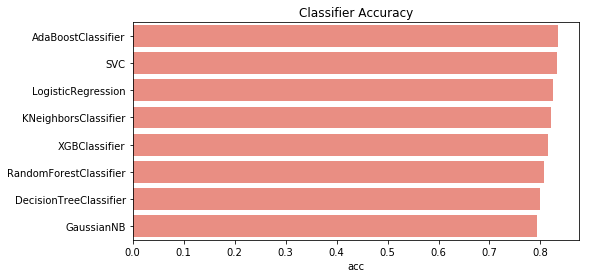

In [57]:
fig = plt.figure(figsize=(8,4))
plt.title('Classifier Accuracy')
sns.barplot(x='acc', y=log.index, data=log, color = 'salmon')
plt.show()

In [58]:
log['acc_after']=0
grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]

grid_param = [{
            #KNeighborsClassifier
            'n_neighbors': [1,2,3,4,5,6,7], #default: 5
            'weights': ['uniform', 'distance'], #default = ‘uniform’
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            },
            
            {
            # DecisionTreeClassifier
            'criterion': grid_criterion,  #scoring methodology; two supported formulas for calculating information gain - default is gini
            'max_depth': grid_max_depth, #max depth tree can grow; default is none
            'random_state': grid_seed
            },
    
            {
            #RandomForestClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'oob_score': [True],
            'random_state': grid_seed
            },
    
            {
            #AdaBoostClassifier
            'n_estimators': grid_n_estimator, #default=50
            'learning_rate': grid_learn, #default=1
            'random_state': grid_seed
            },
    
            #GaussianNB
            {},
    
            {
            #LogisticRegression
            'fit_intercept': grid_bool, #default: True
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
            'random_state': grid_seed
            },
    
            {
            #SVC
            #'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [1,2,3,4,5], #default=1.0
            'gamma': grid_ratio, #edfault: auto
            'decision_function_shape': ['ovo', 'ovr'], #default:ovr
            'probability': [True],
            'random_state': grid_seed
            },
    
            {
            #XGBClassifier
            'learning_rate': grid_learn, #default: .3
            'max_depth': [1,2,4,6,8,10], #default 2
            'n_estimators': grid_n_estimator, 
            'seed': grid_seed  
            }  
        ]

In [ ]:
for idx,clf in enumerate(classifiers):
    print(clf.__class__.__name__)
    tune_model = model_selection.GridSearchCV(clf, param_grid=grid_param[idx], scoring = 'roc_auc', cv = sss)
    tune_model.fit(train.drop(['Survived','Age','Fare','Alone'],axis=1), train['Survived'])
    print('Best parameters: ',tune_model.best_params_)
    print('New Acc: ',tune_model.cv_results_['mean_test_score'].mean())
    log.loc[clf.__class__.__name__,'acc_after']=tune_model.cv_results_['mean_test_score'].mean()
    print('-'*10)

KNeighborsClassifier
Best parameters:  {'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'uniform'}
New Acc:  0.8160942387904067
----------
DecisionTreeClassifier
Best parameters:  {'criterion': 'entropy', 'max_depth': 4, 'random_state': 0}
New Acc:  0.8373313104736037
----------
RandomForestClassifier
Best parameters:  {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 100, 'oob_score': True, 'random_state': 0}
New Acc:  0.8553068239687658
----------
AdaBoostClassifier
Best parameters:  {'learning_rate': 0.25, 'n_estimators': 300, 'random_state': 0}
New Acc:  0.8486623663215074
----------
GaussianNB
Best parameters:  {}
New Acc:  0.8455737565778305
----------
LogisticRegression
Best parameters:  {'fit_intercept': True, 'random_state': 0, 'solver': 'newton-cg'}
New Acc:  0.8398468002037006
----------
SVC
Best parameters:  {'C': 3, 'decision_function_shape': 'ovo', 'gamma': 0.1, 'probability': True, 'random_state': 0}
New Acc:  0.8314746223052114
----------
XGBClassifier


In [ ]:
fig = plt.figure(figsize=(8,4))
log = log.sort_values(['acc_after'],ascending=False)
plt.title('Classifier Accuracy')
sns.barplot(x='acc_after', y=log.index, data=log, color = 'salmon')
plt.show()

## Testing

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
test.isnull().sum()

In [ ]:
test.drop(['Ticket','Cabin'],axis=1,inplace=True)
test.loc[(test['Pclass']==1) & (test['Sex']=='female') & (test['Age'].isnull()),'Age'] = 34.611765
test.loc[(test['Pclass']==2) & (test['Sex']=='female') & (test['Age'].isnull()),'Age'] = 28.722973
test.loc[(test['Pclass']==3) & (test['Sex']=='female') & (test['Age'].isnull()),'Age'] = 21.75
test.loc[(test['Pclass']==1) & (test['Sex']=='male') & (test['Age'].isnull()),'Age'] = 41.281386
test.loc[(test['Pclass']==2) & (test['Sex']=='male') & (test['Age'].isnull()),'Age'] = 30.740707
test.loc[(test['Pclass']==3) & (test['Sex']=='male') & (test['Age'].isnull()),'Age'] = 26.507589
test['Embarked'].replace(np.nan, 'S', inplace=True)
test['Fare'].replace(np.nan,train['Fare'].mean(),inplace=True)
test['Title'] = test['Name'].str.split(",",expand=True)[1].str.split(".",expand=True)[0]
test['Family Size'] = test['Parch']+test["SibSp"]+1
test['Alone'] = 1
test.loc[(test['SibSp']>0) | (test['Parch']>0),'Alone'] = 0
test['Age_interval'] = 0
test.loc[(test['Age']>17) & (test['Age']<=31),'Age_interval'] = 1
test.loc[(test['Age']>31) & (test['Age']<=40),'Age_interval'] = 2
test.loc[(test['Age']>40) & (test['Age']<=59),'Age_interval'] = 3
test.loc[test['Age']>59,'Age_interval'] = 4
test['Fare_interval'] = 0
test.loc[test['Fare']>30,'Fare_interval'] = 1

test.drop(['Name','SibSp','Parch'],axis=1,inplace=True)
test['Family Size']=test['Family Size'].replace([2,3,4],2)
test['Family Size']=test['Family Size'].replace([5,6,7,8,11],3)
test['Title']=test['Title'].replace([' the Countess',' Sir',' Capt',' Jonkheer',' Don',' Col',' Major',' Rev',' Dr',' Dona'],'others')
test['Title']=test['Title'].replace([' Ms',' Mlle',' Lady'],' Miss')
test['Title']=test['Title'].replace([' Mme'],' Mrs')

test['Sex'] = test['Sex'].map({'female':0,'male':1})
test['Embarked'] = test['Embarked'].map({'S':0,'Q':1,'C':2})
test['Title'] = test['Title'].map({' Mrs':0,' Miss':1,' Master':2, 'others':3, ' Mr':4})

In [ ]:
X_test = test.drop(["PassengerId",'Age','Fare','Alone'],axis=1).values

In [ ]:
test.drop(["PassengerId",'Age','Fare','Alone'],axis=1)

In [ ]:
X = train.drop(['Survived','Age','Fare','Alone'],axis=1).values
Y = train['Survived'].astype(int).values.reshape(-1,)

In [ ]:
model = XGBClassifier(learning_rate=0.03, max_depth=2, n_estimators=300, seed=0)
model.fit(X, Y)
Y_pred = model.predict(X_test)
test['Survived'] = Y_pred
test[['PassengerId','Survived']].to_csv('submission.csv',index=False)